In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/Sam/Downloads/Data-Preparation-07.csv')
print(df.shape)

/var/folders/t8/98kc315d6592z5nmcq76rt9h0000gn/T/ipykernel_14256/2728453467.py:1: DtypeWarning: Columns (14,16,27,28,33,48,50,55,56,61,67,89,105,107,112,114,129,130,138,139,146,148,151,152,159,180,211,217,218,219,220,221,222,223,224) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/Sam/Downloads/Data-Preparation-07.csv')


(2949338, 225)


In [3]:
irrelevant_columns = [
    # Climate Control & Cabin Features
    'is_climate_on', 'driver_temp_setting', 'passenger_temp_setting',
    'seat_heater_left', 'seat_heater_right', 'steering_wheel_heater',
    'side_mirror_heaters', 'fan_status', 'auto_seat_climate_left', 'auto_seat_climate_right',
    
    # Safety Systems & Warnings
    'sentry_mode', 'service_mode', 'valet_mode',
    'tpms_hard_warning_fl', 'tpms_hard_warning_fr', 'tpms_hard_warning_rl', 'tpms_hard_warning_rr',
    'tpms_last_seen_pressure_time_fl', 'tpms_last_seen_pressure_time_fr',
    'tpms_last_seen_pressure_time_rl', 'tpms_last_seen_pressure_time_rr',
    'tpms_pressure_fl', 'tpms_pressure_fr', 'tpms_pressure_rl', 'tpms_pressure_rr',
    'tpms_rcp_front_value', 'tpms_rcp_rear_value',
    'tpms_soft_warning_fl', 'tpms_soft_warning_fr', 'tpms_soft_warning_rl', 'tpms_soft_warning_rr',
    
    # Entertainment & Miscellaneous
    'webcam_selfie_supported', 'webcam_supported', 'santa_mode', 'notifications_supported',
    
    # Charging Scheduling (Detailed)
    'off_peak_charging_enabled', 'off_peak_hours_end_time', 'preconditioning_times',
    'charge_current_request', 'charge_current_request_max',  # Unnecessary charging diagnostics

    # Appearance & Vehicle Metadata
    'exterior_color', 'wheel_type', 'interior_trim_type',
    'roof_color', 'vehicle_name', 'car_special_type',

    # Diagnostic & Metadata
    'vehicle_self_test_progress',  # Unrelated to current features
    'vehicle_self_test_requested',  # Duplicate from diagnostics
    'dashcam_statesentry_mode',  # Specific to safety but not prioritized

    # Redundant and Granular Features
    'battery_energy_remaining',  # Not specified in battery recommendations
    'active_route_speed_limit_mph',  # Too detailed for route guidance

    # Other redundant or rarely used columns
    'valet_pin_needed',  # Unnecessary metadata
    'speed_limit_mode',  # Not related to current route guidance
    'steering_angle',  # Not specified for any recommendations
    'time_to_full_charge',  # Rarely referenced and redundant
    'service_interval_remaining',  # Unrelated to recommendations
    'powertrain_state'  # Too granular for high-level recommendations
]


In [4]:
# Drop the irrelevant columns
df = df.drop(columns=irrelevant_columns, errors='ignore')

In [5]:
df.shape

(2949338, 174)

In [6]:
df.shape

(2949338, 174)

In [7]:
df.head()

,battery_heater_on,battery_level,battery_range,charge_amps,charge_enable_request,charge_energy_added,charge_limit_soc,charge_limit_soc_max,charge_limit_soc_min,charge_limit_soc_std,...,Folder Name,Folder Month,tpms_last_seen_pressure_time_fl_utc,tpms_last_seen_pressure_time_fl_utc_date_only,tpms_last_seen_pressure_time_fr_utc,tpms_last_seen_pressure_time_fr_utc_date_only,tpms_last_seen_pressure_time_rl_utc,tpms_last_seen_pressure_time_rl_utc_date_only,tpms_last_seen_pressure_time_rr_utc,tpms_last_seen_pressure_time_rr_utc_date_only
0,False,91.0,241.54,32.0,True,40.72,100,100,50,80,...,IN/CA/2024/07/None,7,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:07+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30
1,False,91.0,241.54,32.0,True,40.72,100,100,50,80,...,IN/CA/2024/07/None,7,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:07+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30
2,False,91.0,241.54,32.0,True,40.72,100,100,50,80,...,IN/CA/2024/07/None,7,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:07+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30
3,False,91.0,241.54,32.0,True,40.72,100,100,50,80,...,IN/CA/2024/07/None,7,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:07+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30
4,False,91.0,241.54,32.0,True,40.72,100,100,50,80,...,IN/CA/2024/07/None,7,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:07+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30,2024-06-30 08:26:06+00:00,2024-06-30


In [8]:
df['timestamp']

0          1719792027933
1          1719792040077
2          1719792045406
3          1719792052766
4          1719792054209
               ...      
2949333    1722470342019
2949334    1722470359175
2949335    1722470380628
2949336    1722470396621
2949337    1722470397898
Name: timestamp, Length: 2949338, dtype: int64

## Aggregating Data (Milliseconds to Minutes)

In [9]:
def aggregate_large_dataset(dataframe, timestamp_col):
    # Step 1: Convert timestamp column to datetime
    dataframe['datetime'] = pd.to_datetime(dataframe[timestamp_col], unit='ms')

    # Step 2: Create a new column for grouping by minute
    dataframe['minute'] = dataframe['datetime'].dt.floor('T')

    # Step 3: Define aggregation functions
    def mode(series):
        return series.mode()[0] if not series.mode().empty else None

    aggregation_functions = {}
    for col in dataframe.columns:
        if col in [timestamp_col, 'datetime']:
            continue
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            aggregation_functions[col] = 'mean'
        elif dataframe[col].dtype == 'object' or dataframe[col].dtype.name == 'category' or dataframe[col].dtype == 'bool':
            aggregation_functions[col] = mode

    # Step 4: Group by minute and aggregate
    aggregated_data = dataframe.groupby('minute').agg(aggregation_functions).reset_index()
    return aggregated_data

electric_car_df = aggregate_large_dataset(df, timestamp_col='timestamp')

/var/folders/t8/98kc315d6592z5nmcq76rt9h0000gn/T/ipykernel_14256/4234486381.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dataframe['minute'] = dataframe['datetime'].dt.floor('T')
/var/folders/t8/98kc315d6592z5nmcq76rt9h0000gn/T/ipykernel_14256/4234486381.py:10: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  return series.mode()[0] if not series.mode().empty else None
/var/folders/t8/98kc315d6592z5nmcq76rt9h0000gn/T/ipykernel_14256/4234486381.py:10: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  return series.mode()[0] if not series.mode().empty else None


In [10]:
electric_car_df

,minute,battery_heater_on,battery_level,battery_range,charge_amps,charge_enable_request,charge_energy_added,charge_limit_soc,charge_limit_soc_max,charge_limit_soc_min,...,Folder Name,Folder Month,tpms_last_seen_pressure_time_fl_utc,tpms_last_seen_pressure_time_fl_utc_date_only,tpms_last_seen_pressure_time_fr_utc,tpms_last_seen_pressure_time_fr_utc_date_only,tpms_last_seen_pressure_time_rl_utc,tpms_last_seen_pressure_time_rl_utc_date_only,tpms_last_seen_pressure_time_rr_utc,tpms_last_seen_pressure_time_rr_utc_date_only
0,2024-07-01 00:00:00,0.0,59.432836,154.237612,35.388060,0.910448,18.866119,88.298507,100.0,50.0,...,IN/CA/2024/07/None,7.0,2024-06-30 21:57:25+00:00,2024-06-30,2024-06-30 21:56:55+00:00,2024-06-30,2024-06-30 21:57:25+00:00,2024-06-30,2024-06-30 21:56:55+00:00,2024-06-30
1,2024-07-01 00:01:00,0.0,59.784615,152.317077,34.723077,0.938462,19.236308,90.215385,100.0,50.0,...,IN/CA/2024/07/None,7.0,2024-06-30 22:23:17+00:00,2024-06-30,2024-06-30 22:23:17+00:00,2024-06-30,2024-06-30 22:23:17+00:00,2024-06-30,2024-06-30 22:23:17+00:00,2024-06-30
2,2024-07-01 00:02:00,0.0,60.694444,156.972639,34.652778,0.916667,19.370139,89.222222,100.0,50.0,...,IN/CA/2024/07/None,7.0,2024-06-30 21:57:25+00:00,2024-06-30,2024-06-30 21:56:55+00:00,2024-06-30,2024-06-30 21:57:25+00:00,2024-06-30,2024-06-30 21:56:55+00:00,2024-06-30
3,2024-07-01 00:03:00,0.0,57.955224,148.365075,34.820896,0.940299,17.748955,88.626866,100.0,50.0,...,IN/CA/2024/07/None,7.0,2024-06-30 20:03:46+00:00,2024-06-30,2024-06-30 20:03:16+00:00,2024-06-30,2024-06-30 20:03:16+00:00,2024-06-30,2024-06-30 20:03:16+00:00,2024-06-30
4,2024-07-01 00:04:00,0.0,56.407407,141.792593,33.333333,1.000000,16.592963,89.444444,100.0,50.0,...,IN/CA/2024/07/None,7.0,2024-06-30 20:05:46+00:00,2024-06-30,2024-06-30 20:05:16+00:00,2024-06-30,2024-06-30 20:05:46+00:00,2024-06-30,2024-06-30 20:05:46+00:00,2024-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44606,2024-07-31 23:55:00,0.0,70.557143,193.758714,39.085714,0.914286,25.556857,88.914286,100.0,50.0,...,IN/CA/2024/07/None,7.0,2024-07-31 23:30:11+00:00,2024-07-31,2024-07-31 23:29:39+00:00,2024-07-31,2024-07-31 23:29:39+00:00,2024-07-31,2024-07-31 23:30:08+00:00,2024-07-31
44607,2024-07-31 23:56:00,0.0,71.319444,189.280139,37.222222,0.930556,23.154722,89.597222,100.0,50.0,...,IN/CA/2024/07/None,7.0,2024-07-31 23:26:52+00:00,2024-07-31,2024-07-31 23:26:52+00:00,2024-07-31,2024-07-31 23:26:52+00:00,2024-07-31,2024-07-31 23:26:22+00:00,2024-07-31
44608,2024-07-31 23:57:00,0.0,70.890411,191.498904,37.589041,0.931507,23.831370,89.589041,100.0,50.0,...,IN/CA/2024/07/None,7.0,2024-07-31 18:55:03+00:00,2024-07-31,2024-07-31 18:54:33+00:00,2024-07-31,2024-07-31 18:54:34+00:00,2024-07-31,2024-07-14 05:13:51+00:00,2024-07-31
44609,2024-07-31 23:58:00,0.0,71.000000,192.022469,38.469136,0.938272,24.652222,89.012346,100.0,50.0,...,IN/CA/2024/07/None,7.0,2024-07-31 18:55:03+00:00,2024-07-31,2024-07-31 18:54:33+00:00,2024-07-31,2024-07-31 18:54:34+00:00,2024-07-31,2024-07-14 05:13:51+00:00,2024-07-31


## Recommendation 1

### Route and Driving Guidance 

### 1. Provide recommendations for the scheduled_departure_time based on the route and recent future traffic prediction 
### 2. Suggest whether to activate Sentry Mode based on the safety level of the environment and theft rate. 

In [12]:
#1. Route and Driving Guidance
route_and_driving_guidance_columns = [
    'scheduled_departure_time',
    'active_route_minutes_to_arrival',
    'active_route_traffic_minutes_delay',
    'can_accept_navigation_requests',
]



In [157]:
#2. Weather Recommendations
#weather_recommendations_columns = []
#With xternal Weather Forecast Data API

In [14]:
#3. Battery
battery_columns = [
    'battery_heater_on',
    'battery_range',
    'charge_miles_added_ideal',
    'charge_port_cold_weather_mode',
    'charge_port_door_open',
    'fast_charger_present',
    'max_range_charge_counter',
]


In [16]:
# Filter for columns that exist in the dataset
available_battery_columns = [col for col in battery_columns if col in electric_car_df.columns]

# Extract the available battery-related data
battery_data = electric_car_df[available_battery_columns]





In [17]:
battery_data.head()

,battery_heater_on,battery_range,charge_miles_added_ideal,charge_port_cold_weather_mode,charge_port_door_open,fast_charger_present,max_range_charge_counter
0,0.0,154.237612,79.328358,False,False,False,6.044776
1,0.0,152.317077,81.215385,False,False,False,7.200000
2,0.0,156.972639,81.826389,False,False,False,6.750000
3,0.0,148.365075,73.880597,False,False,False,7.522388
4,0.0,141.792593,69.296296,False,False,False,8.666667


In [135]:
# 2. Boolean Column Counts
boolean_columns = battery_data.select_dtypes(include=['bool']).columns
if len(boolean_columns) > 0:
    print("\nBoolean Column Value Counts:")
    for col in boolean_columns:
        print(f"{col}:\n{battery_data[col].value_counts()}\n")

# 3. Missing Values
print("\nMissing Value Counts:")
print(battery_data.isnull().sum())





Boolean Column Value Counts:
charge_port_door_open:
charge_port_door_open
False    30745
True     13866
Name: count, dtype: int64

fast_charger_present:
fast_charger_present
False    44611
Name: count, dtype: int64


Missing Value Counts:
battery_heater_on                0
battery_range                    0
charge_miles_added_ideal         0
charge_port_cold_weather_mode    1
charge_port_door_open            0
fast_charger_present             0
max_range_charge_counter         0
dtype: int64


In [136]:
battery_data.shape

(44611, 7)

In [125]:
# Filter for rows where 'battery_heater_on' is True
battery_heater_on_true = battery_data[battery_data['battery_heater_on'] == True]

# Display the filtered data
print("\nRows where 'battery_heater_on' is True:")
print(battery_heater_on_true)





Rows where 'battery_heater_on' is True:
         battery_heater_on  battery_range  charge_miles_added_ideal  \
1144534               True          19.24                       3.5   
1144535               True          19.57                       4.0   
1144536               True          19.89                       4.0   
1144537               True          20.54                       5.0   
1144538               True          20.87                       6.0   
...                    ...            ...                       ...   
2925223               True          94.38                      49.5   
2925224               True          94.38                      49.5   
2925225               True          94.38                      49.5   
2925226               True          94.38                      49.5   
2925227               True          94.38                      49.5   

        charge_port_cold_weather_mode charge_port_door_open  \
1144534                           NaN      

In [138]:
# Drop all rows with null values in the battery data
battery_data_cleaned = battery_data.dropna()

# Recalculate Boolean Column Counts
boolean_columns = battery_data_cleaned.select_dtypes(include=['bool']).columns
if len(boolean_columns) > 0:
    print("\nBoolean Column Value Counts (After Dropping Nulls):")
    for col in boolean_columns:
        print(f"{col}:\n{battery_data_cleaned[col].value_counts()}\n")

# Recalculate Missing Values
print("\nMissing Value Counts (After Dropping Nulls):")
print(battery_data_cleaned.isnull().sum())

# Display cleaned data for verification
print("\nCleaned Data Sample:")
print(battery_data_cleaned.head())



Boolean Column Value Counts (After Dropping Nulls):
charge_port_door_open:
charge_port_door_open
False    30744
True     13866
Name: count, dtype: int64

fast_charger_present:
fast_charger_present
False    44610
Name: count, dtype: int64


Missing Value Counts (After Dropping Nulls):
battery_heater_on                0
battery_range                    0
charge_miles_added_ideal         0
charge_port_cold_weather_mode    0
charge_port_door_open            0
fast_charger_present             0
max_range_charge_counter         0
dtype: int64

Cleaned Data Sample:
   battery_heater_on  battery_range  charge_miles_added_ideal  \
0                0.0     154.237612                 79.328358   
1                0.0     152.317077                 81.215385   
2                0.0     156.972639                 81.826389   
3                0.0     148.365075                 73.880597   
4                0.0     141.792593                 69.296296   

  charge_port_cold_weather_mode  charge_por

In [139]:
battery_data_cleaned.shape

(44610, 7)

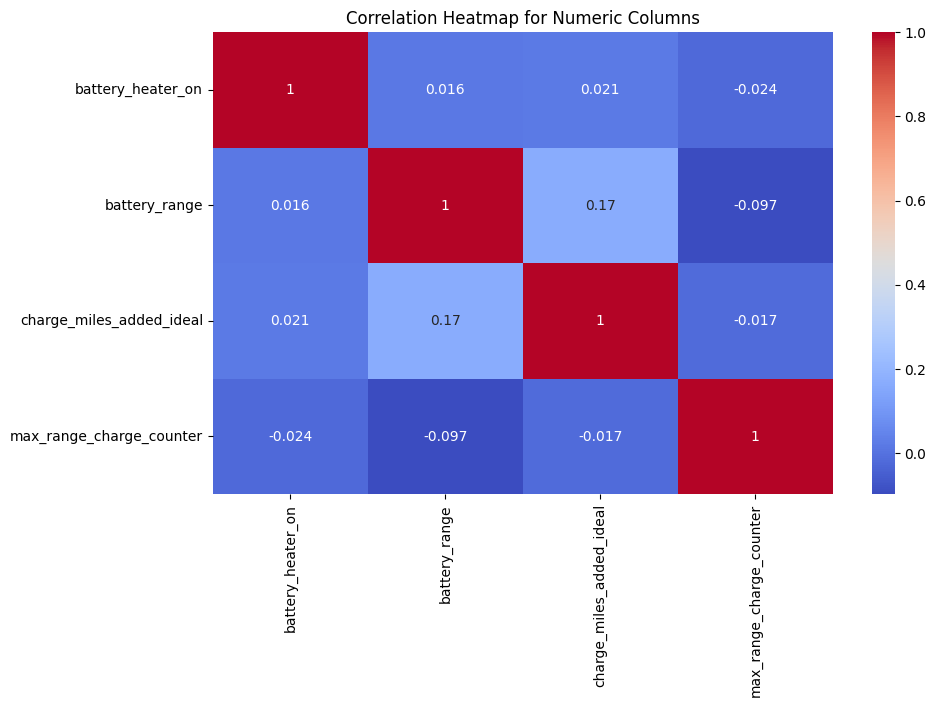

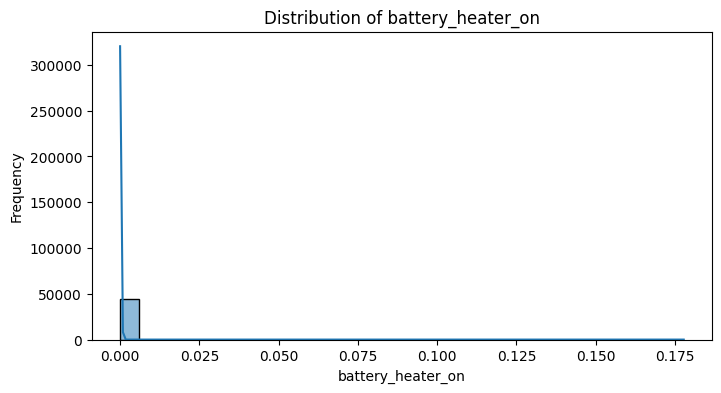

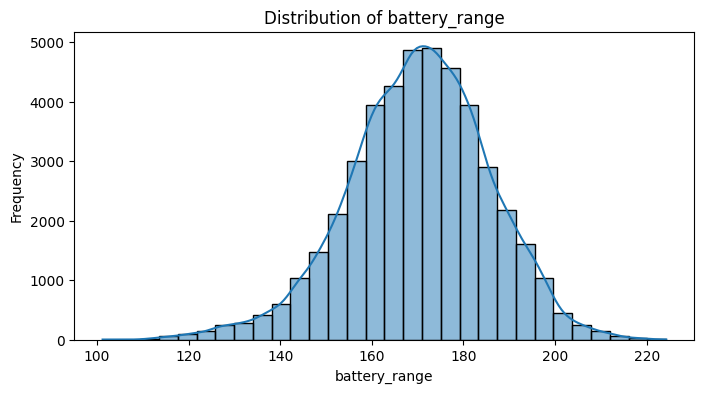

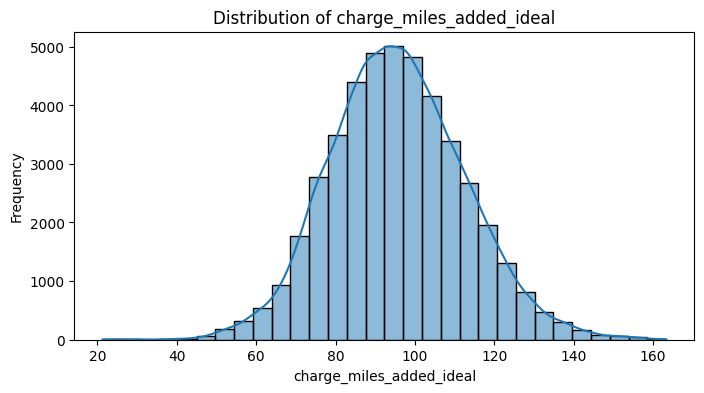

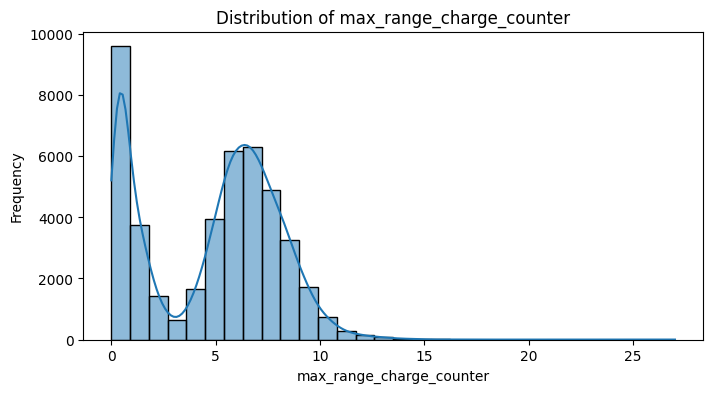

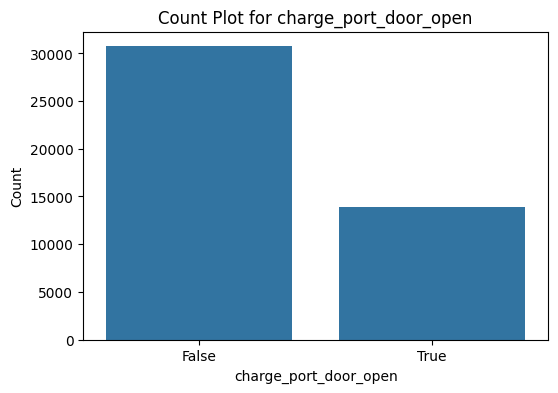

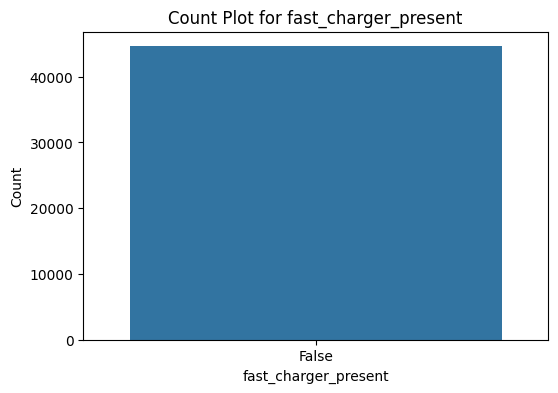

In [141]:
# 4. Correlation Heatmap for Numeric Columns
numeric_columns = battery_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_columns) > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(battery_data_cleaned[numeric_columns].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap for Numeric Columns")
    plt.show()

# 5. Distribution Plots for Numeric Columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(battery_data_cleaned[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# 6. Count Plots for Boolean Columns
for col in boolean_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=battery_data_cleaned[col])
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [129]:
#4. Event Recommendations
#event_recommendations_columns = []
# External resturant and Events Data API


In [130]:
#5. Cabin Environment
cabin_environment_columns = [
    'allow_cabin_overheat_protection',
    'auto_seat_climate_left',
    'auto_seat_climate_right',
    'bioweapon_mode',
    'side_mirror_heaters',
    'defrost_mode',
    'dashcam_statesentry_mode',
    'vehicle_self_test_requested',
  
]

In [131]:
#6. Idle Time Detection
#idle_time_detection_columns = []


